In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#FBProphet library import
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [16]:
#Imporing data and slicing the column that is required
#The date column is converted to Date Time format
rail = pd.read_csv('rail_sorted.csv')
df= rail[["Date","Total"]]
df['Date'] = df.Date.str.replace('/','-')
#df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y') 
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1164 non-null   datetime64[ns]
 1   Total   1164 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.3 KB


<ipython-input-16-82b36102d905>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-82b36102d905>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
#Requirement for FBProphet for the column names to be like below
df.columns = ['ds','y']

In [18]:
df.head()

,ds,y
0,2019-04-22,5493
1,2019-04-23,9152
2,2019-04-24,10665
3,2019-04-25,6179
4,2019-04-26,10217


In [19]:
# Base line model wihtout any optimisation
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365) 
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
#Predictions from the model 
#The predictions gives upper and lower bound for the predicted data point (yhat)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-04-22,14264.032000,9785.596401,15922.335532,14264.032000,14264.032000,-1527.463421,-1527.463421,-1527.463421,418.138391,418.138391,418.138391,-1945.601812,-1945.601812,-1945.601812,0.0,0.0,0.0,12736.568580
1,2019-04-23,14253.770473,10997.664056,17097.827433,14253.770473,14253.770473,-128.593737,-128.593737,-128.593737,1724.646306,1724.646306,1724.646306,-1853.240043,-1853.240043,-1853.240043,0.0,0.0,0.0,14125.176736
2,2019-04-24,14243.508945,11153.461817,17194.929386,14243.508945,14243.508945,36.033733,36.033733,36.033733,1781.633035,1781.633035,1781.633035,-1745.599303,-1745.599303,-1745.599303,0.0,0.0,0.0,14279.542678
3,2019-04-25,14233.247418,11372.224747,17438.762786,14233.247418,14233.247418,83.204668,83.204668,83.204668,1707.173731,1707.173731,1707.173731,-1623.969063,-1623.969063,-1623.969063,0.0,0.0,0.0,14316.452086
4,2019-04-26,14222.985890,11272.983838,17390.450414,14222.985890,14222.985890,264.840478,264.840478,264.840478,1754.749316,1754.749316,1754.749316,-1489.908838,-1489.908838,-1489.908838,0.0,0.0,0.0,14487.826368


In [21]:
#Prediction plot - can drag to see the actual and predicted value. The black dots are the actual data points
plot_plotly(m ,forecast)

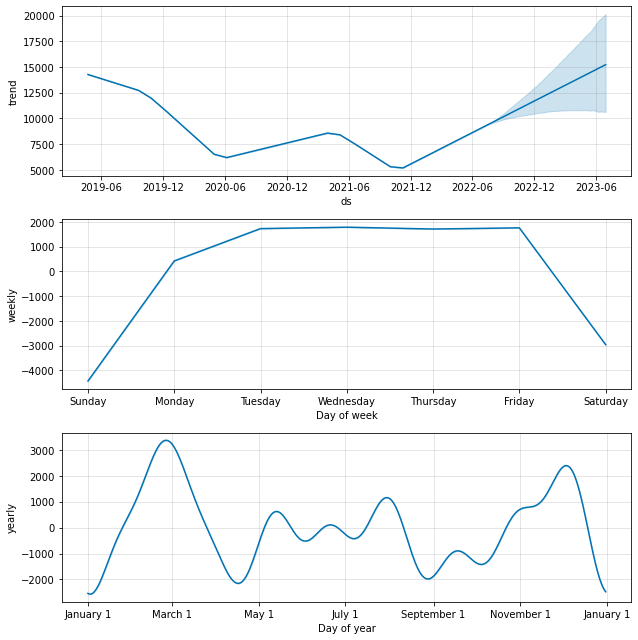

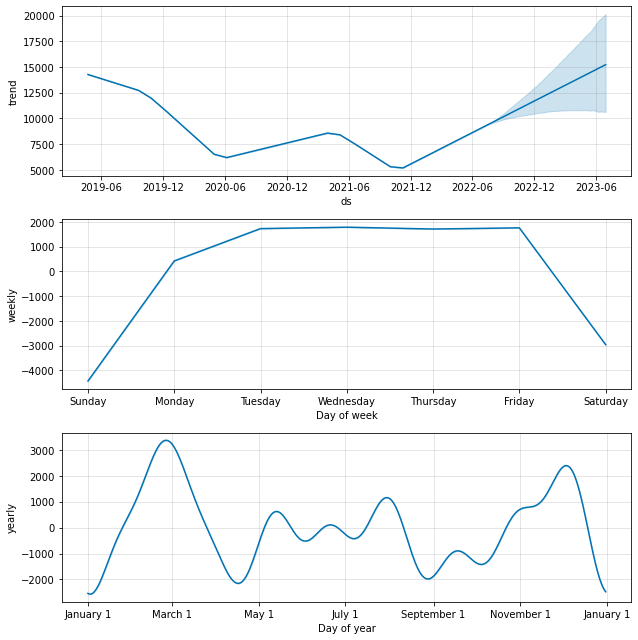

In [22]:
#Plotting the forecasted components separately. Can see weekly raise
m.plot_components(forecast)

In [23]:
#Cross validation for 365 day horizon
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-30 00:00:00 and 2021-06-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-01,12716.171095,10040.355080,15369.016058,9430,2021-06-30
1,2021-07-02,12892.620222,10299.949816,15463.307786,9940,2021-06-30
2,2021-07-03,7600.575664,4901.600575,10251.382858,4915,2021-06-30
3,2021-07-04,5993.852358,3255.419851,8502.804353,3640,2021-06-30
4,2021-07-05,11476.668919,8995.885682,14110.738959,9526,2021-06-30


In [24]:
#MAPE for the model
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p['mape']


0      0.438005
1      0.436187
2      0.453624
3      0.476242
4      0.465455
         ...   
324    1.860993
325    1.800003
326    1.805711
327    1.814270
328    1.822569
Name: mape, Length: 329, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



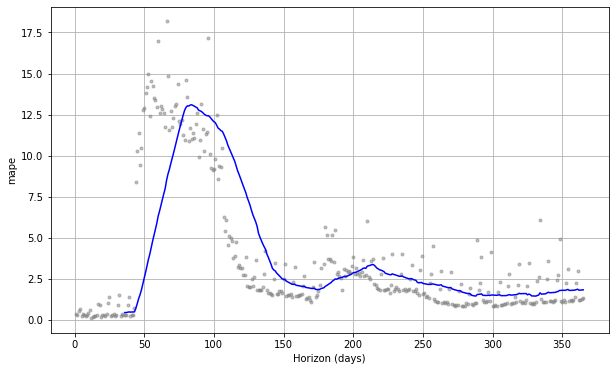

In [25]:
#Plotting the MAPE
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [30]:
#Model 2 with weekly seasonality turned on and Changepoint parameter specified to control the trend line
m2 = Prophet(uncertainty_samples=False,
                    weekly_seasonality = True,
                    changepoint_prior_scale = 0.5)
m2.fit(df)
future = m2.make_future_dataframe(periods=365,) 
forecast = m2.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
plot_plotly(m2 ,forecast)

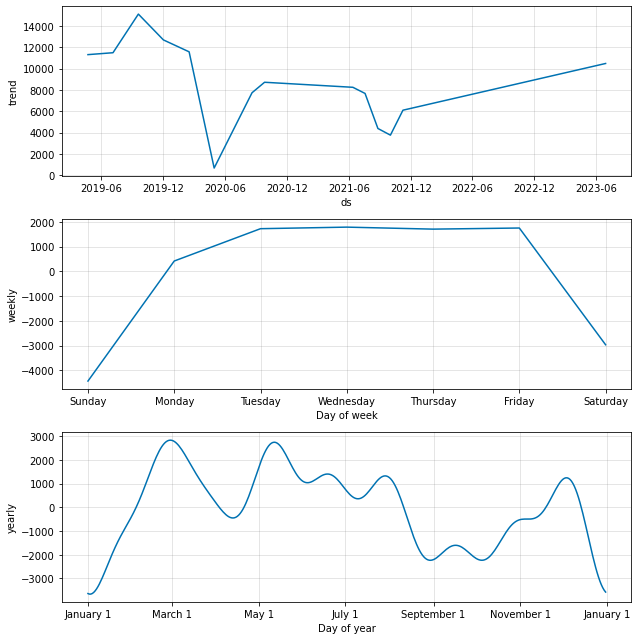

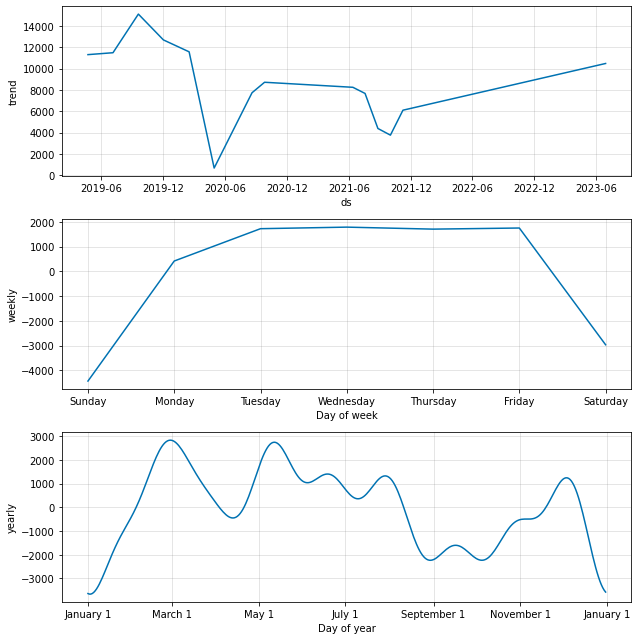

In [32]:
#Plotting of model components
m2.plot_components(forecast)

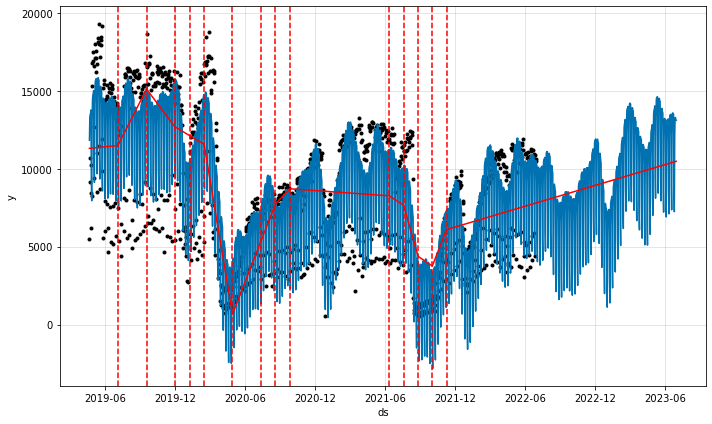

In [33]:
#Plot of the model2 wiht the default change points picked by FBProphet. The default change point are resonable
from prophet.plot import add_changepoints_to_plot
fig = m2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m2, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-30 00:00:00 and 2021-06-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,y,cutoff
0,2021-07-01,10544.161744,9430,2021-06-30
1,2021-07-02,10608.822733,9940,2021-06-30
2,2021-07-03,5205.684295,4915,2021-06-30
3,2021-07-04,3488.745812,3640,2021-06-30
4,2021-07-05,8867.484010,9526,2021-06-30


In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.mape

0      0.094202
1      0.093681
2      0.093347
3      0.094122
4      0.097693
         ...   
324    0.172353
325    0.161670
326    0.162310
327    0.161395
328    0.160348
Name: mape, Length: 329, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



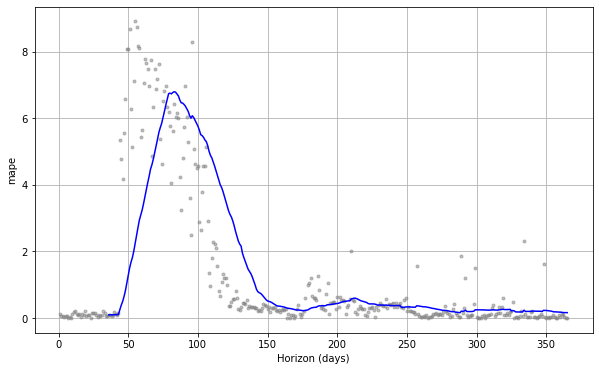

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
##Treating Covid Lockdown as holidays. We will not specify the holidays in future data 
#This way the model understands its a one time effect and doesnt pickup the trend during lockdowns

In [37]:
#Creating holiday DF
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [38]:
#Model3 with holiday component. AS the holiday component is not added in the future data set this is trated as only one year holiday
#This way we can restrict the model to capture the covid effect and continue wiht the trend in the future 
m3 = Prophet(uncertainty_samples=False,
                    weekly_seasonality = True,
                    changepoint_prior_scale = 0.5,
                    holidays=lockdowns)
m3.fit(df)
future = m3.make_future_dataframe(periods=366,) 
forecast = m3.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
plot_plotly(m3 ,forecast)

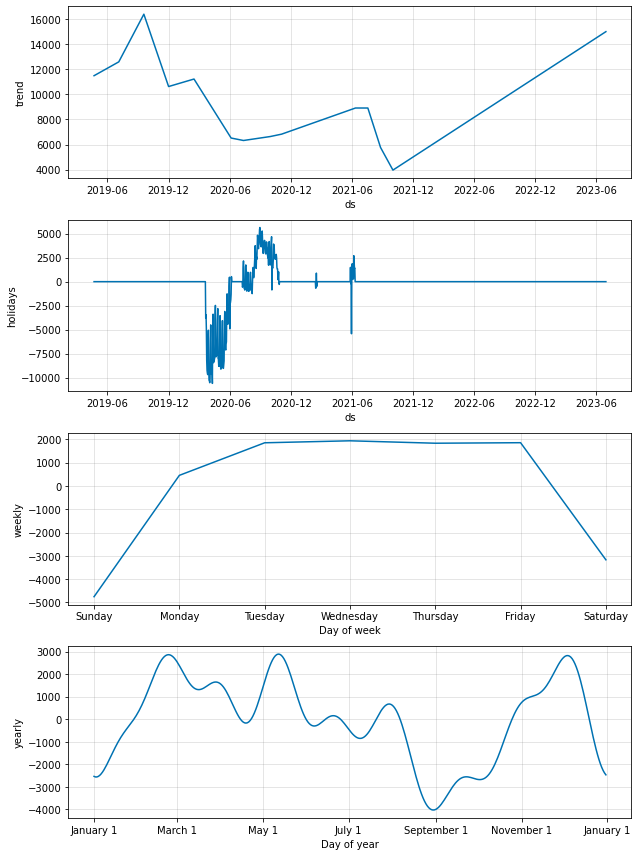

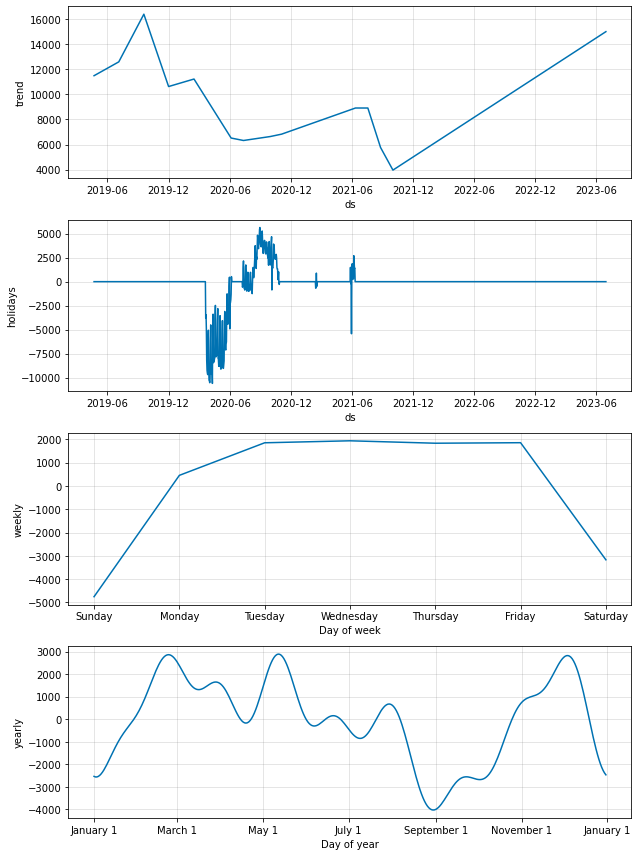

In [40]:
m3.plot_components(forecast)

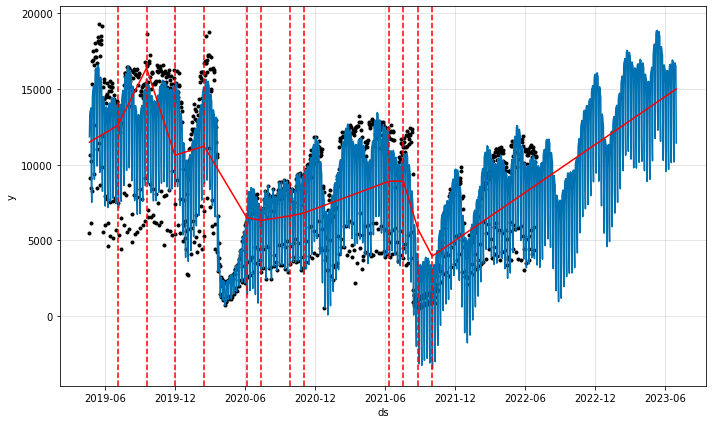

In [41]:
#Plot with default change points on model 3
from prophet.plot import add_changepoints_to_plot
fig = m3.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

In [42]:
df_cv = cross_validation(m3, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-30 00:00:00 and 2021-06-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,y,cutoff
0,2021-07-01,10878.687440,9430,2021-06-30
1,2021-07-02,10963.421944,9940,2021-06-30
2,2021-07-03,4858.820129,4915,2021-06-30
3,2021-07-04,2920.197212,3640,2021-06-30
4,2021-07-05,9114.270739,9526,2021-06-30


In [44]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.mape

0      0.104556
1      0.101577
2      0.105889
3      0.114602
4      0.109656
         ...   
324    0.431490
325    0.408615
326    0.408812
327    0.409402
328    0.409637
Name: mape, Length: 329, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



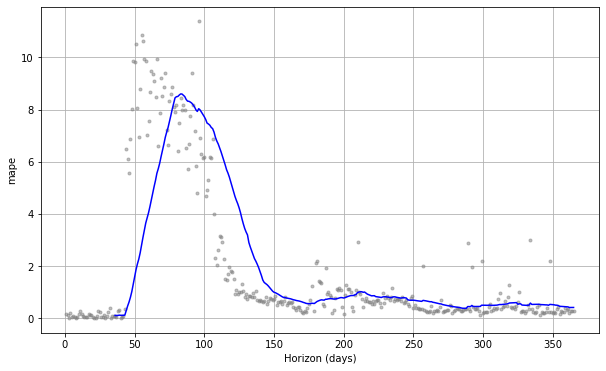

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [46]:
#Model 4 with wiht adjsuted changepoint scale in the model to control the trend line
m4 = Prophet(uncertainty_samples=False,
                    weekly_seasonality = True,
                    changepoint_prior_scale = 0.75,
                     holidays=lockdowns,
            )
m4 = m4.fit(df)
future = m4.make_future_dataframe(periods=366)
forecast2 = m4.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
plot_plotly(m4,forecast)

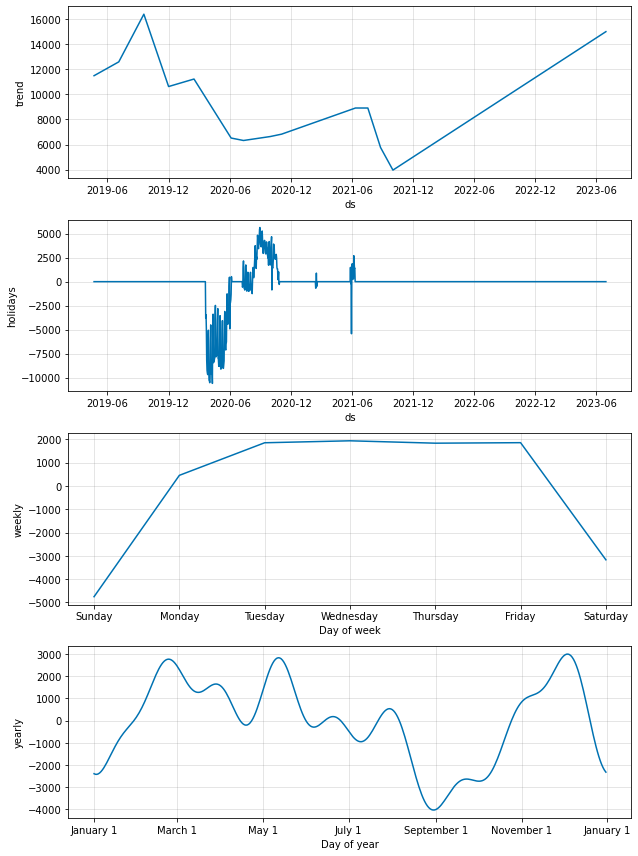

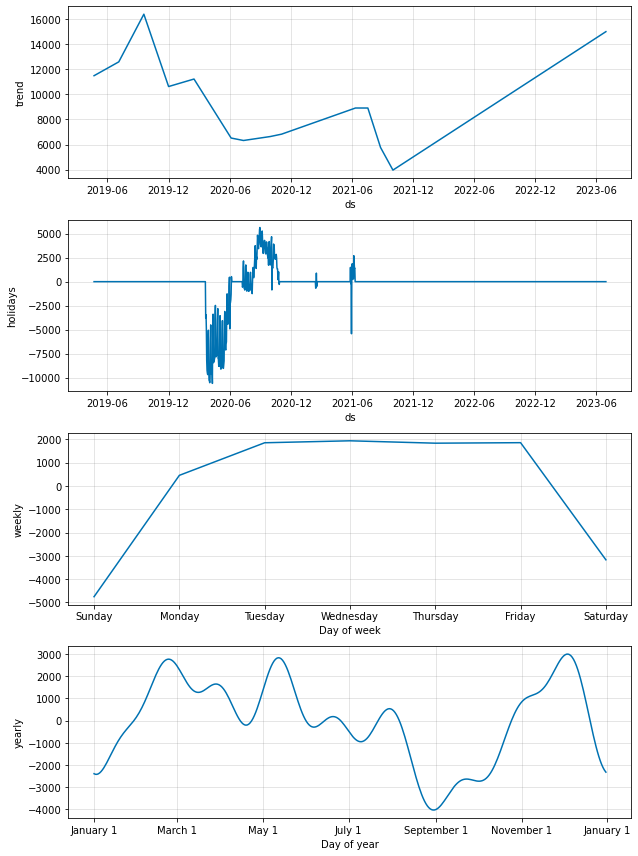

In [48]:
m4.plot_components(forecast)